In [2]:
import pandas as pd 
import json
import os 
from os.path import join
import random

train_classes = sorted(os.listdir('OfficeHomeDataset_10072016/Real World'))[:40]
len(train_classes), train_classes

(40,
 ['Alarm_Clock',
  'Backpack',
  'Batteries',
  'Bed',
  'Bike',
  'Bottle',
  'Bucket',
  'Calculator',
  'Calendar',
  'Candles',
  'Chair',
  'Clipboards',
  'Computer',
  'Couch',
  'Curtains',
  'Desk_Lamp',
  'Drill',
  'Eraser',
  'Exit_Sign',
  'Fan',
  'File_Cabinet',
  'Flipflops',
  'Flowers',
  'Folder',
  'Fork',
  'Glasses',
  'Hammer',
  'Helmet',
  'Kettle',
  'Keyboard',
  'Knives',
  'Lamp_Shade',
  'Laptop',
  'Marker',
  'Monitor',
  'Mop',
  'Mouse',
  'Mug',
  'Notebook',
  'Oven'])

In [3]:
mapping = {k:i for i,k in enumerate(train_classes)}

In [4]:
frames = []
for clas in train_classes:
    path = join('OfficeHomeDataset_10072016/Real World',clas)
    for image in os.listdir(path):
        frames.append(pd.DataFrame({
            'image':join(path, image),
            'label_name':clas,
            'label':mapping[clas]
        }, index = [0]))

In [5]:
df = pd.concat(frames).reset_index(drop = True)
# .to_csv('OfficeHomeDataset_10072016/train.csv', index = False)
df

,image,label_name,label
0,OfficeHomeDataset_10072016/Real World/Alarm_Cl...,Alarm_Clock,0
1,OfficeHomeDataset_10072016/Real World/Alarm_Cl...,Alarm_Clock,0
2,OfficeHomeDataset_10072016/Real World/Alarm_Cl...,Alarm_Clock,0
3,OfficeHomeDataset_10072016/Real World/Alarm_Cl...,Alarm_Clock,0
4,OfficeHomeDataset_10072016/Real World/Alarm_Cl...,Alarm_Clock,0
...,...,...,...
2743,OfficeHomeDataset_10072016/Real World/Oven/000...,Oven,39
2744,OfficeHomeDataset_10072016/Real World/Oven/000...,Oven,39
2745,OfficeHomeDataset_10072016/Real World/Oven/000...,Oven,39
2746,OfficeHomeDataset_10072016/Real World/Oven/000...,Oven,39


In [6]:
val_df = df.sample(frac=0.2, replace = False)
train_df = df[~df['image'].isin(val_df['image'].values)]

In [7]:
val_df.shape, train_df.shape

((550, 3), (2198, 3))

In [8]:
train_df.to_csv('OfficeHomeDataset_10072016/train.csv', index = False)
val_df.to_csv('OfficeHomeDataset_10072016/val.csv', index = False)
df.to_csv('OfficeHomeDataset_10072016/train_2.csv', index = False)

In [9]:
val_classes = sorted(os.listdir('/Users/sarthakm/Desktop/biplabsir_research/gcd/OfficeHomeDataset_10072016/Clipart'))
len(val_classes)

65

In [10]:
mapping = {k:i for i,k in enumerate(val_classes)}

In [11]:
frames = []
for clas in val_classes:
    path = join('OfficeHomeDataset_10072016/Clipart',clas)
    for image in os.listdir(path):
        frames.append(pd.DataFrame({
            'image':join(path, image),
            'label_name':clas,
            'label':mapping[clas]
        }, index = [0]))

In [12]:
pd.concat(frames).to_csv('OfficeHomeDataset_10072016/test.csv', index = False)


/tmp/ipykernel_2712296/1846994787.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


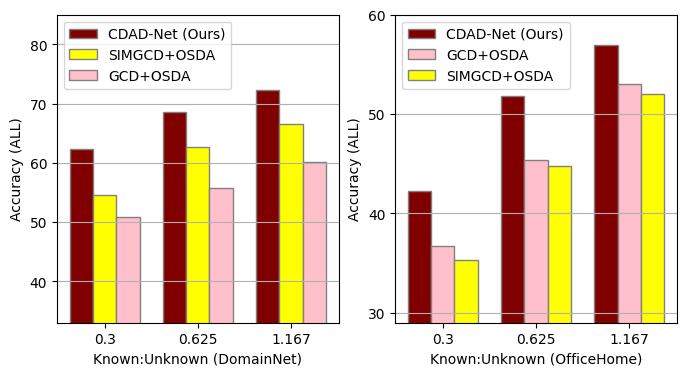

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4)) 
 
# set height of bar 
simgcd = [35.33,44.78,52]
gcd = [36.7,45.4,53]
ours = [42.3,51.8,57]

gcd_dn = [50.92,55.8,60.07]
simgcd_dn = [54.57,62.6,66.53]
ours_dn = [62.4,68.57,72.34]
 
# Set position of bar on X axis 
br1 = np.arange(len(gcd)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
plt.subplot(1,2,2)
# Make the plot
plt.bar(br1, ours, color ='maroon', width = barWidth, 
        edgecolor ='grey', label ='CDAD-Net (Ours)') 
plt.bar(br2, gcd, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='GCD+OSDA') 
plt.bar(br3, simgcd, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='SIMGCD+OSDA') 

 
# Adding Xticks 
plt.xlabel('Known:Unknown (OfficeHome)', fontsize = 10) 
plt.ylabel('Accuracy (ALL)',  fontsize = 10) 
plt.xticks([r + barWidth for r in range(len(gcd))], 
        ['0.3', '0.625', '1.167'])
plt.yticks([30,40,50,60])

plt.ylim(29,60)
plt.legend()
plt.grid(axis='y')


plt.subplot(1,2,1)
# Make the plot
plt.bar(br1, ours_dn, color ='maroon', width = barWidth, 
        edgecolor ='grey', label ='CDAD-Net (Ours)') 
plt.bar(br2, simgcd_dn, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='SIMGCD+OSDA') 
plt.bar(br3, gcd_dn, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='GCD+OSDA') 


 
# Adding Xticks 
plt.xlabel('Known:Unknown (DomainNet)', fontsize = 10) 
plt.ylabel('Accuracy (ALL)',  fontsize = 10) 
plt.xticks([r + barWidth for r in range(len(gcd))], 
        ['0.3', '0.625', '1.167'])
plt.yticks([30,40,50,60,70,80])

plt.ylim(33,85)
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show() 

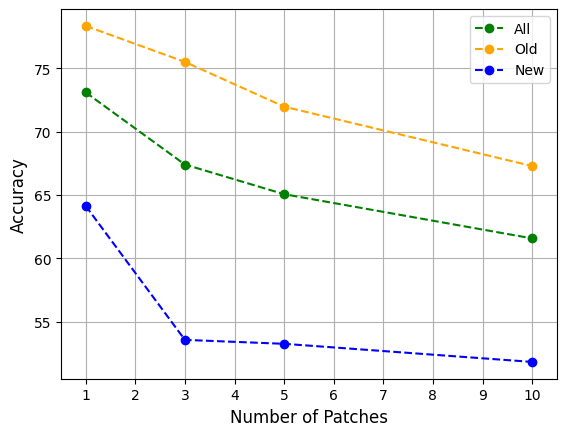

In [5]:
import matplotlib.pyplot as plt

all = [73.1, 67.41, 65.07, 61.58]
old = [78.35,75.51,71.98,67.29]
new = [64.14,53.57,53.26,51.83]

plt.plot([1,3,5,10], all, linestyle='--', marker='o', color='g',label='All')
plt.plot([1,3,5,10], old, linestyle='--', marker='o', color='orange',label='Old')
plt.plot([1,3,5,10], new, linestyle='--', marker='o', color='b',label='New')

plt.xlabel('Number of Patches',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xlim(0.5,10.5)
plt.xticks(range(1,11))
plt.grid()
plt.legend()